# Gardening-robot

## Criando um Robô Jardineiro 

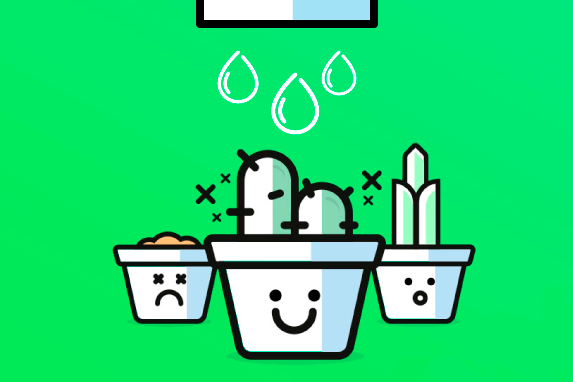

In [1]:
from IPython.display import Image
Image("p.png")

In [2]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

%matplotlib inline

### Explorando dados

In [10]:
df = pd.read_csv('plantacao.csv')

In [11]:
df.columns

Index([u'ID', u' MES', u' DIA', u' Hora', u' umidade '], dtype='object')

In [12]:
print "Total de amostras coletados do dataset: ",len(df)

Total de amostras coletados do dataset:  5403


### Pre-processando dados

In [13]:
df.describe()

,ID,MES,DIA,Hora,umidade
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2.931890,5.514344,20.991116,11.572090,60.335739
std,0.990788,0.499840,1.396667,7.030724,25.768100
min,1.000000,5.000000,19.000000,0.000000,0.000000
25%,2.000000,5.000000,20.000000,5.000000,47.000000
50%,3.000000,6.000000,21.000000,12.000000,64.000000
75%,4.000000,6.000000,22.000000,18.000000,81.000000
max,4.000000,6.000000,23.000000,23.000000,99.000000


LinAlgError: singular matrix

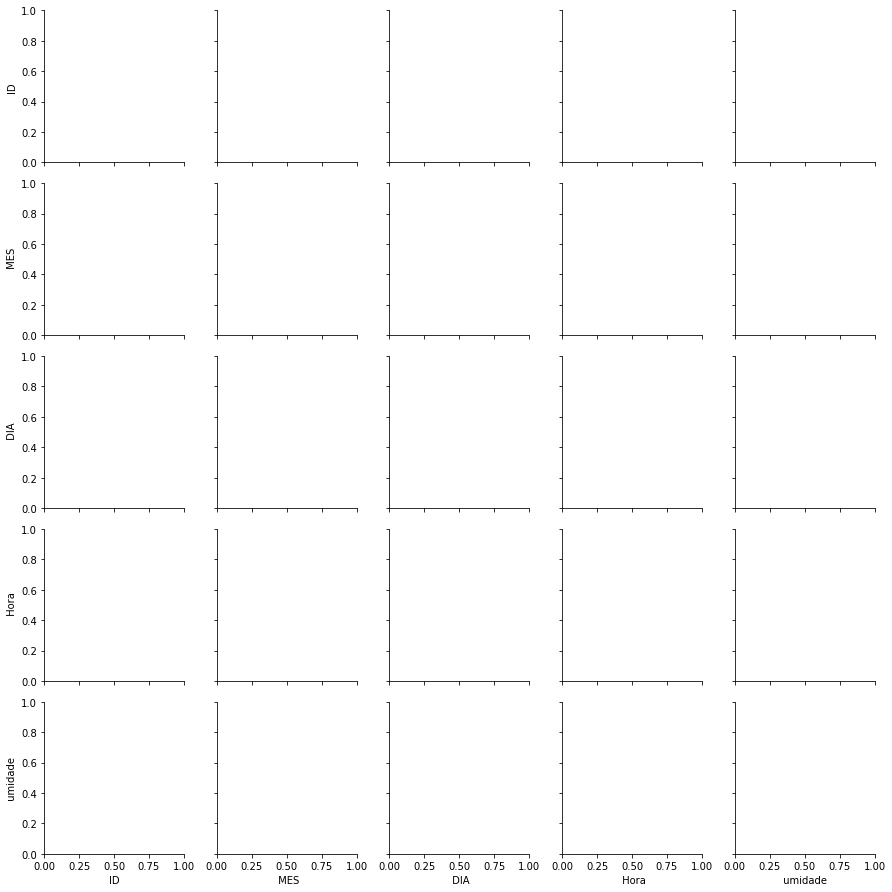

In [14]:
#sb.pairplot(df, hue='ID')
sb.pairplot(df,hue='ID')

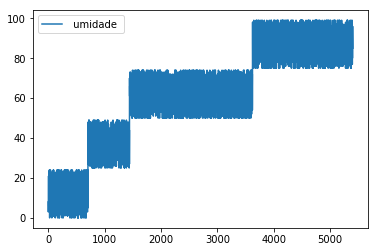

In [20]:
umidade = df[df.columns[4:]] 
umidade.plot()
#fig.savefig('output.png')


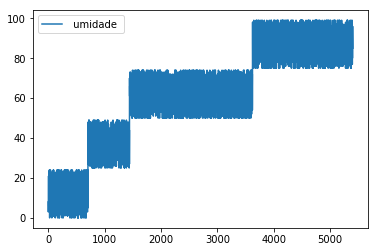

In [24]:
plot = umidade.plot()
fig = plot.get_figure()
fig.savefig("output.png")


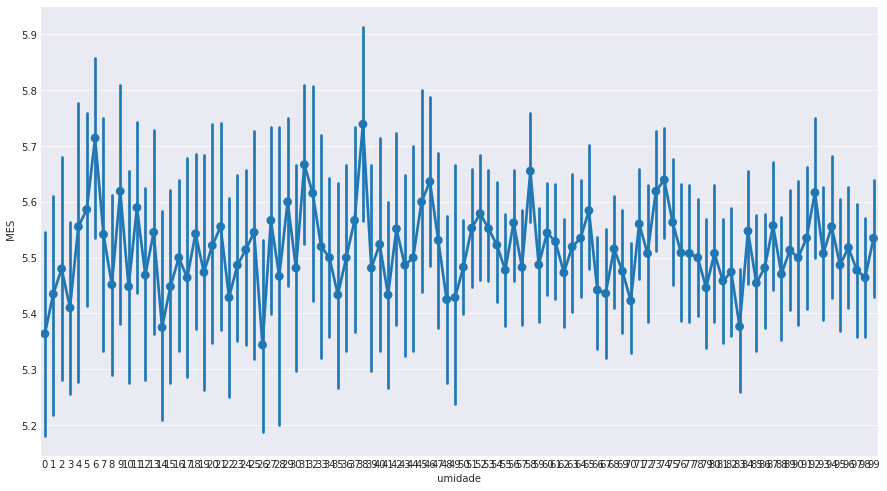

In [10]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()

fig.set_size_inches(15, 8.27)
sns.pointplot(x=" umidade ", y=" MES",data=df, join=True, capsize=0, size=0, aspect=0)


## Criando Variavel de Treino

In [11]:
#print df.drop('ID',axis = 1)
X = np.array(df.drop('ID',axis = 1))

## Criando Variavel de Test

In [12]:
y = np.array(df["ID"])
type(y)
type(df["ID"])

pandas.core.series.Series

## Avaliando Algoritmos

#### Algoritmos Selecionados 
1. [K-NN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
2. [K-Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
3. [Mistura Gaussiano](http://scikit-learn.org/stable/modules/mixture.html)

## Avaliando e testando algoitmos

### Classificando com K-NN, K-Means e GaussianMixture
#### Aqui basicamente vamos pegar nossas variaveis de treino e test e vamos aplicar no classificador que irá aprender de acordo com os dados que colocamos como entrada

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [14]:
knn = KNeighborsClassifier(n_neighbors=4)
kmeans = KMeans(n_clusters=4,random_state=0)
clusterer = GaussianMixture(n_components=4,random_state=0)

In [15]:
print knn.fit(X,y)
print kmeans.fit(X,y)
print clusterer.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


## Metricas de Avaliação

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Redução de Dimensões

In [17]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print X
X_pca


[[ 6 21 11  8]
 [ 5 22  3  3]
 [ 6 22 22 11]
 ...
 [ 0 11 17 31]
 [ 1 11 12 38]
 [ 1 26 17 12]]


array([[ 50.85004852,   0.75790162],
       [ 55.80522268,   8.7810007 ],
       [ 47.90503703, -10.26930877],
       ...,
       [ 28.01639192,  -5.19613373],
       [ 20.97978661,  -0.24392246],
       [ 46.88968915,  -5.28070301]])

### BenchMark Silhouette Score 

In [18]:
""" 
 clusterer_gaus = GaussianMixture(n_components = p, random_state = 23)
 clusterer_gaus.fit(X_pca)
 preds = clusterer.predict(X_pca)
 score1 = silhouette_score(X_pca, preds)   
    
 print "Clusters GaussianMixture = {}. Silhouette_score: {}".format(p, score1)   
"""
score_gaus = []
score_KMeans = []

for p in range(2,30):
 clusterer_Gaus = GaussianMixture(n_components = p, random_state = 10)
 clusterer_KMeans = KMeans(n_clusters = p, random_state=10)
 
 
 cluster_label_gaus = clusterer_Gaus.fit(X_pca)
 cluster_label_kmeans = clusterer_KMeans.fit(X_pca)
 

 preds0 = clusterer_Gaus.predict(X_pca)
 preds1 = clusterer_KMeans.predict(X_pca)
 
 
 score0 = silhouette_score(X_pca, preds0)   
 score1 = silhouette_score(X_pca, preds1)   
 score_gaus.append(score0)
 score_KMeans.append(score1) 

 #print "Clusters Gaussian  = {} | Silhouette_score: {}".format(p, score0)
 #print "Clusters KMeans \t = {} | Silhouette_score: {}".format(p, score1)
 print "Clusters | Gaussian  = {} | Silhouette: {} | KMeans = {} | Silhouette: {}".format(p,score0,p,score1)

Clusters | Gaussian  = 2 | Silhouette: 0.566770913047 | KMeans = 2 | Silhouette: 0.556859043372
Clusters | Gaussian  = 3 | Silhouette: 0.492226226716 | KMeans = 3 | Silhouette: 0.491629871535
Clusters | Gaussian  = 4 | Silhouette: 0.413245062336 | KMeans = 4 | Silhouette: 0.412773033528
Clusters | Gaussian  = 5 | Silhouette: 0.384228818675 | KMeans = 5 | Silhouette: 0.385949069871
Clusters | Gaussian  = 6 | Silhouette: 0.321264744342 | KMeans = 6 | Silhouette: 0.386805546291
Clusters | Gaussian  = 7 | Silhouette: 0.306624297149 | KMeans = 7 | Silhouette: 0.380791063119
Clusters | Gaussian  = 8 | Silhouette: 0.343450433802 | KMeans = 8 | Silhouette: 0.381452678181
Clusters | Gaussian  = 9 | Silhouette: 0.345631219307 | KMeans = 9 | Silhouette: 0.371375306903
Clusters | Gaussian  = 10 | Silhouette: 0.359143388969 | KMeans = 10 | Silhouette: 0.367208786047
Clusters | Gaussian  = 11 | Silhouette: 0.364379414479 | KMeans = 11 | Silhouette: 0.37578873112
Clusters | Gaussian  = 12 | Silhouett

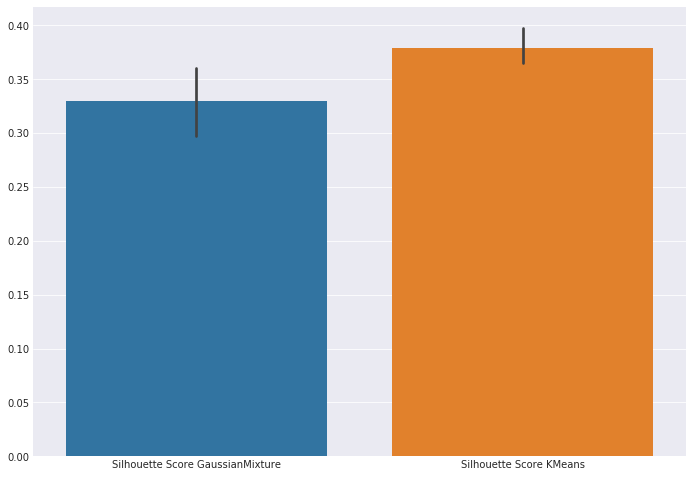

In [19]:


d={}
d['Silhouette Score GaussianMixture']=score_gaus
d['Silhouette Score KMeans']=score_KMeans
#d = np.reshape(d,(28,2))
#print d
#d = np.array([score_gaus,score_KMeans])
#sns.barplot(x="time", y="tip",            data=d,order=["Dinner", "Lunch"])
d = pd.DataFrame.from_dict(d, orient='columns', dtype=None)

a4_dims = (11.7, 8.27)
df = d
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(data=d)




### Valor  de distancia do K em NN

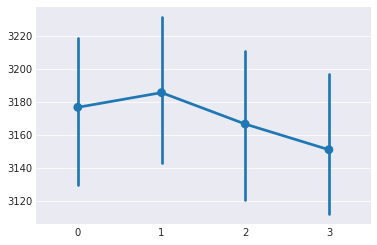

In [20]:
distances, indices = knn.kneighbors(X)
sns.pointplot(data=indices)

[[0.         1.         1.41421356 1.41421356]
 [0.         1.         1.         1.        ]
 [0.         1.         1.41421356 1.41421356]
 ...
 [0.         2.23606798 3.31662479 3.31662479]
 [0.         3.16227766 3.74165739 4.24264069]
 [0.         2.64575131 3.31662479 3.31662479]]


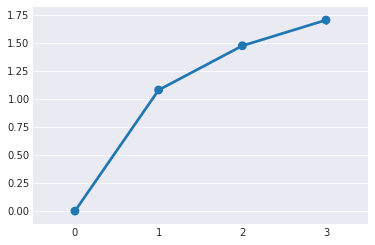

In [21]:
print distances
sns.pointplot(data=distances)


### Accuracy com Score e train_test_split

In [22]:
y_pred_val = knn.predict(X)

Accurary_score =  float(accuracy_score(y, y_pred_val))* 100
print "ACCURACY: \t   [",Accurary_score,"    ] Score"

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.5,
                                                    random_state=42)
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)
y_score = classifier.score(X_test,y_test)*100
print "Train_test_split:  [",y_score,"] Score"

ACCURACY: 	   [ 93.1327768152     ] Score
Train_test_split:  [ 89.07086614173228 ] Score


## Fazendo uma Predição com dados novos de outro sensor

In [23]:
def predicao(lista):
 nivel =  knn.predict([lista])
 if nivel[0] == 1: return "arido"
 if nivel[0] == 2: return "seco"
 if nivel[0] == 3: return "umido"
 if nivel[0] == 4: return "molhado"

In [24]:
MES = raw_input("MES: ")
DIA = raw_input("DIA: ")
Hora = raw_input("Hora: ")
umidade = raw_input("umidade ")
lista = [MES,DIA, Hora, umidade]
pred = predicao(lista)
print pred

MES: 1
DIA: 5
Hora: 15
umidade 90
arido


##### COMENTARIOS ALEATORIOS 

Test de Rede Neural Perceptron
Test de K-mean()
Test de SVM(exemplo de alguem)
Test de 

Mateus Facuri

Pos agrupamento rodar SVM

Rede Convolutiva testar esse algoritmo 

 K-Means  silhueta versus k
metstrar vizualização 
achar valor de K e plotar 



In [25]:
books = {}
books["auth1"] = {}
books["auth2"] = {}
books["auth1"]["humor"] = 20
books["auth1"]["action"] = 30
books["auth2"]["comedy"] = 20


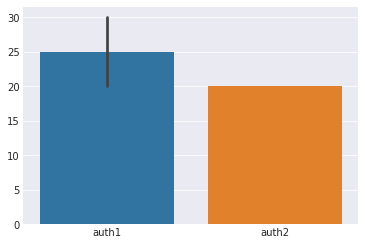

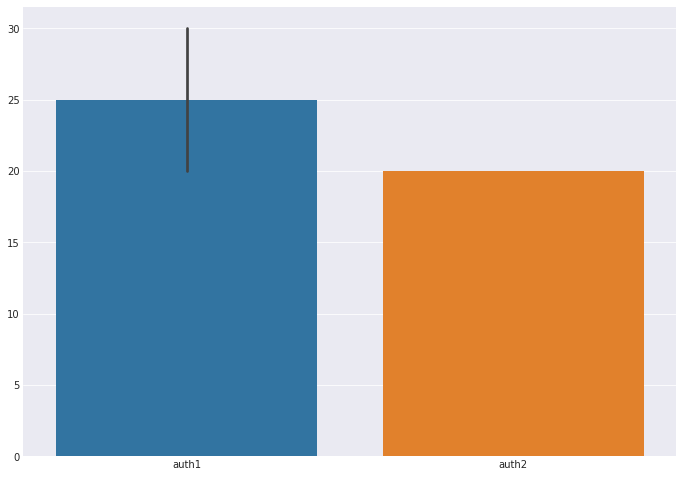

In [26]:
data = pd.DataFrame.from_dict(books, orient='columns', dtype=None)
sns.barplot(data=data)




from matplotlib import pyplot
import seaborn



a4_dims = (11.7, 8.27)
df = d
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(data=data)




In [27]:
range(1,int(y_score))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88]